In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import sys

In [101]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (6,6)
plt.rcParams.update({'font.size': 14})

In [4]:
NPART = 16

In [5]:
def fix_phi(phi):
    phi %= (2*np.pi)
    if phi > np.pi:
        phi -= 2*np.pi
    return phi

In [6]:
fix_phi_vec = np.vectorize(fix_phi)

In [7]:
df_2p1 = pd.read_hdf("/nobackup/users/sangeon/datasets/jetLHCO/LHCO_dijet_2p2p_4500_150_150_16part_jet1.h5")
df_2p2 = pd.read_hdf("/nobackup/users/sangeon/datasets/jetLHCO/LHCO_dijet_2p2p_4500_150_150_16part_jet2.h5")
df_3p1 = pd.read_hdf("/nobackup/users/sangeon/datasets/jetLHCO/LHCO_dijet_2p2p_4500_300_300_16part_jet1.h5")
df_3p2 = pd.read_hdf("/nobackup/users/sangeon/datasets/jetLHCO/LHCO_dijet_2p2p_4500_300_300_16part_jet2.h5")
#df_3p1 = pd.read_hdf("/nobackup/users/sangeon/datasets/jetLHCO/LHCO_dijet_2p2p_4000_500_150_16part_jet1.h5")
#df_3p2 = pd.read_hdf("/nobackup/users/sangeon/datasets/jetLHCO/LHCO_dijet_2p2p_4000_500_150_16part_jet2.h5")

dt_2p1 = df_2p1.values 
dt_2p2 = df_2p2.values 
dt_3p1 = df_3p1.values 
dt_3p2 = df_3p2.values 

In [35]:
df_2p1 = pd.read_hdf("/nobackup/users/sangeon/datasets/jetLHCO/LHCO_dijet_2p2p_4500_150_150_16part_jet1.h5")
df_2p2 = pd.read_hdf("/nobackup/users/sangeon/datasets/jetLHCO/LHCO_dijet_2p2p_4500_150_150_16part_jet2.h5")
df_3p1 = pd.read_hdf("/nobackup/users/sangeon/datasets/jetLHCO/LHCO_dijet_3p3p_4500_150_150_16part_jet1.h5")
df_3p2 = pd.read_hdf("/nobackup/users/sangeon/datasets/jetLHCO/LHCO_dijet_3p3p_4500_150_150_16part_jet2.h5")
#df_3p1 = pd.read_hdf("/nobackup/users/sangeon/datasets/jetLHCO/LHCO_dijet_2p2p_4000_500_150_16part_jet1.h5")
#df_3p2 = pd.read_hdf("/nobackup/users/sangeon/datasets/jetLHCO/LHCO_dijet_2p2p_4000_500_150_16part_jet2.h5")

dt_2p1 = df_2p1.values 
dt_2p2 = df_2p2.values 
dt_3p1 = df_3p1.values 
dt_3p2 = df_3p2.values 

In [67]:
df_2p1 = pd.read_hdf("/nobackup/users/sangeon/datasets/jetLHCO/LHCO_dijet_2p2p_3200_300_300_16part_jet1.h5")
df_2p2 = pd.read_hdf("/nobackup/users/sangeon/datasets/jetLHCO/LHCO_dijet_2p2p_3200_300_300_16part_jet2.h5")
df_3p1 = pd.read_hdf("/nobackup/users/sangeon/datasets/jetLHCO/LHCO_dijet_3p3p_5000_700_700_16part_jet1.h5")
df_3p2 = pd.read_hdf("/nobackup/users/sangeon/datasets/jetLHCO/LHCO_dijet_3p3p_5000_700_700_16part_jet2.h5")
#df_3p1 = pd.read_hdf("/nobackup/users/sangeon/datasets/jetLHCO/LHCO_dijet_2p2p_4000_500_150_16part_jet1.h5")
#df_3p2 = pd.read_hdf("/nobackup/users/sangeon/datasets/jetLHCO/LHCO_dijet_2p2p_4000_500_150_16part_jet2.h5")

dt_2p1 = df_2p1.values 
dt_2p2 = df_2p2.values 
dt_3p1 = df_3p1.values 
dt_3p2 = df_3p2.values 

In [60]:
sys.path.insert(0,'../training')
from manifoldembedder import JetDataset, JetPredictDataset
from torch.utils.data import DataLoader, random_split

(array([2.1950e+03, 1.1464e+04, 1.7419e+04, 1.7248e+04, 1.6236e+04,
        1.7017e+04, 1.4100e+04, 4.1530e+03, 1.5600e+02, 1.2000e+01]),
 array([  96.53645648,  402.72716261,  708.91786873, 1015.10857485,
        1321.29928098, 1627.4899871 , 1933.68069322, 2239.87139934,
        2546.06210547, 2852.25281159, 3158.44351771]),
 <BarContainer object of 10 artists>)

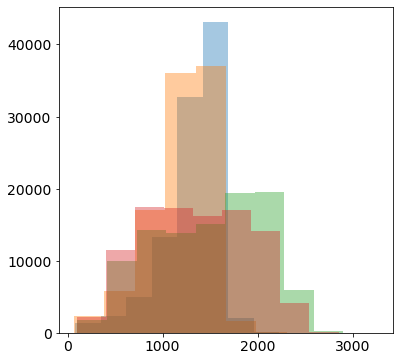

In [61]:
plt.hist(dt_2p1[:,48], alpha=0.4)
plt.hist(dt_2p2[:,48], alpha=0.4)

plt.hist(dt_3p1[:,48], alpha=0.4)
plt.hist(dt_3p2[:,48], alpha=0.4)

(array([1353., 1236., 1068.,  880.,  662.,  425.,  289.,  175.,  104.,
          58.]),
 array([600.02476574, 619.96999967, 639.9152336 , 659.86046753,
        679.80570146, 699.75093539, 719.69616932, 739.64140325,
        759.58663719, 779.53187112, 799.47710505]),
 <BarContainer object of 10 artists>)

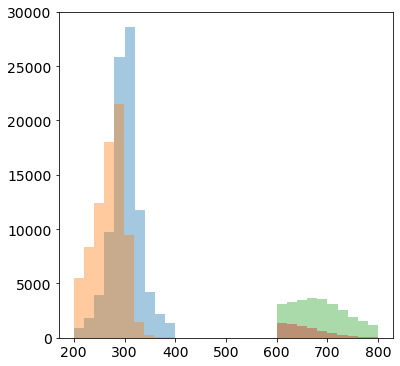

In [69]:
plt.hist(dt_2p1[:,51], alpha=0.4)
plt.hist(dt_2p2[:,51], alpha=0.4)
plt.hist(dt_3p1[:,51], alpha=0.4)
plt.hist(dt_3p2[:,51], alpha=0.4)

In [11]:
dt_2p1 = dt_2p1[dt_2p1[:,51]>400]
dt_2p2 = dt_2p2[dt_2p2[:,51]>400]
dt_3p1 = dt_3p1[dt_3p1[:,51]>400]
dt_3p2 = dt_3p2[dt_3p2[:,51]>400]

In [38]:
dt_2p1 = dt_2p1[(dt_2p1[:,51]<200) & (dt_2p1[:,51]>100)]
dt_2p2 = dt_2p2[(dt_2p2[:,51]<200) & (dt_2p2[:,51]>100)]
dt_3p1 = dt_3p1[(dt_3p1[:,51]<200) & (dt_3p1[:,51]>100)]
dt_3p2 = dt_3p2[(dt_3p2[:,51]<200) & (dt_3p2[:,51]>100)]

In [68]:
dt_2p1 = dt_2p1[(dt_2p1[:,51]<400) & (dt_2p1[:,51]>200)]
dt_2p2 = dt_2p2[(dt_2p2[:,51]<400) & (dt_2p2[:,51]>200)]
dt_3p1 = dt_3p1[(dt_3p1[:,51]<800) & (dt_3p1[:,51]>600)]
dt_3p2 = dt_3p2[(dt_3p2[:,51]<800) & (dt_3p2[:,51]>600)]

In [ ]:
dt_2p1 = dt_2p1[dt_2p1[:,51]>400]
dt_2p2 = dt_2p2[dt_2p2[:,51]>400]
dt_3p1 = dt_3p1[(dt_3p1[:,51]<200) & (dt_3p1[:,51]>100)]
dt_3p2 = dt_3p2[(dt_3p2[:,51]<200) & (dt_3p2[:,51]>100)]

In [64]:
dt_2p1 = dt_2p1[(dt_2p1[:,48]>1000)&(dt_2p1[:,48]<1200)]
dt_2p2 = dt_2p2[(dt_2p2[:,48]>1000)&(dt_2p2[:,48]<1200)]
dt_3p1 = dt_3p1[(dt_3p1[:,48]>1000)&(dt_3p1[:,48]<1200)]
dt_3p2 = dt_3p2[(dt_3p2[:,48]>1000)&(dt_3p2[:,48]<1200)]

In [40]:
dt_2p1 = dt_2p1[(dt_2p1[:,48]>1700)&(dt_2p1[:,48]<1900)]
dt_2p2 = dt_2p2[(dt_2p2[:,48]>1700)&(dt_2p2[:,48]<1900)]
dt_3p1 = dt_3p1[(dt_3p1[:,48]>1700)&(dt_3p1[:,48]<1900)]
dt_3p2 = dt_3p2[(dt_3p2[:,48]>1700)&(dt_3p2[:,48]<1900)]

In [170]:
dt_2p1 = dt_2p1[(dt_2p1[:,48]>1500)&(dt_2p1[:,48]<1600)]
dt_2p2 = dt_2p2[(dt_2p2[:,48]>1500)&(dt_2p2[:,48]<1600)]
dt_3p1 = dt_3p1[(dt_3p1[:,48]>1900)&(dt_3p1[:,48]<2000)]
dt_3p2 = dt_3p2[(dt_3p2[:,48]>1900)&(dt_3p2[:,48]<2000)]

(array([   3.,  109.,  526., 1212., 1953., 1815.,  561.,   53.,   15.,
           3.]),
 array([1198.14673249, 1387.94359633, 1577.74046016, 1767.537324  ,
        1957.33418784, 2147.13105168, 2336.92791551, 2526.72477935,
        2716.52164319, 2906.31850703, 3096.11537087]),
 <BarContainer object of 10 artists>)

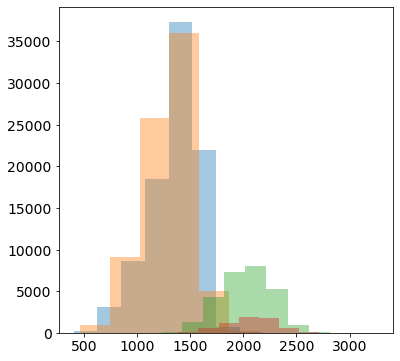

In [70]:
plt.hist(dt_2p1[:,48], alpha=0.4)
plt.hist(dt_2p2[:,48], alpha=0.4)
plt.hist(dt_3p1[:,48], alpha=0.4)
plt.hist(dt_3p2[:,48], alpha=0.4)

In [71]:
print(dt_2p1.shape)
print(dt_2p2.shape)
print(dt_3p1.shape)
print(dt_3p2.shape)

(90400, 54)
(77171, 54)
(27402, 54)
(6250, 54)


In [72]:
dt_2p1[:1000].shape

(1000, 54)

In [73]:
set_2p2p = JetDataset(False, None, False, dt_2p1[:1000],dt_2p1[1000:2000],16)

100%|██████████| 10/10 [00:09<00:00,  1.01it/s]


In [74]:
set_2p3p = JetDataset(False, None, False, dt_2p1[2000:3000],dt_3p1[:1000],16)

100%|██████████| 10/10 [00:09<00:00,  1.01it/s]


In [75]:
set_3p3p = JetDataset(False, None, False, dt_3p1[1000:2000],dt_3p1[2000:3000],16)

100%|██████████| 10/10 [00:09<00:00,  1.01it/s]


In [76]:
loader = DataLoader(set_2p3p, batch_size=500,shuffle=False,num_workers=4)

loader2 = DataLoader(set_2p2p, batch_size=500,shuffle=False,num_workers=4)

loader3 = DataLoader(set_3p3p, batch_size=500,shuffle=False,num_workers=4)

In [77]:
emd = np.array([])
x_1 = np.empty([0, 16, 3])
y_1 = np.empty([0, 16, 3])
for x,y,dist in loader:
    x_1 = np.concatenate([x_1, x.data.numpy()])
    y_1 = np.concatenate([y_1, y.data.numpy()])
    emd = np.concatenate([emd,dist.data.numpy()])
    
emd2 = np.array([])
for x,y,dist in loader2:
    emd2 = np.concatenate([emd2,dist.data.numpy()])

emd3 = np.array([])
for x,y,dist in loader3:
    emd3 = np.concatenate([emd3,dist.data.numpy()])

In [78]:
x_1 = x_1[:,:,[2, 0, 1]]
y_1 = y_1[:,:,[2, 0, 1]]

In [79]:
x_1.shape

(1000, 16, 3)

(array([207., 342., 216., 128.,  60.,  24.,  14.,   3.,   2.,   4.]),
 array([0.0545773 , 0.11536812, 0.17615895, 0.23694977, 0.2977406 ,
        0.35853142, 0.41932224, 0.48011307, 0.54090389, 0.60169472,
        0.66248554]),
 <BarContainer object of 10 artists>)

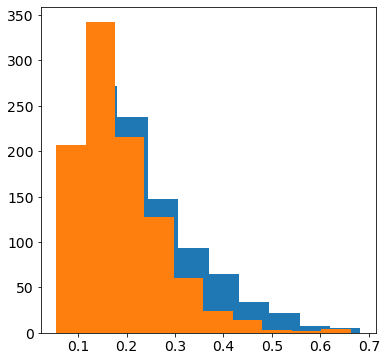

In [80]:
plt.hist(x_1[:,0,0])
plt.hist(y_1[:,0,0])

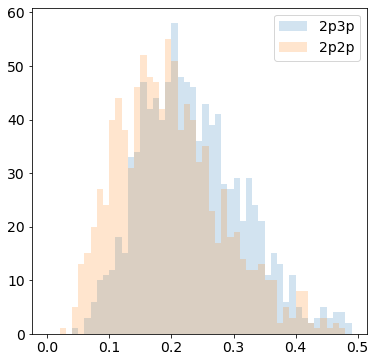

In [120]:
plt.rcParams["figure.figsize"] = (6,6)
plt.hist(emd, bins=np.arange(0,.5,0.01),alpha=0.2, label='2p3p');
plt.hist(emd2, bins=np.arange(0,.5,0.01),alpha=0.2, label='2p2p');
#plt.hist(emd3, bins=np.arange(0,.5,0.01),alpha=0.2, label='3p3p');
plt.legend()
plt.savefig('../figures/EMD_LHCO_2p_3p.png')

In [93]:
def plot_multiple_jets(ax, pfcands, index):

    pt = pfcands[:,0]
    eta = pfcands[:,1]
    phi = pfcands[:,2]
    #fig = plt.figure()
    #ax = fig.add_subplot(1,1,1)
    ax[index].scatter(eta,phi,s=pt*1000, alpha=0.2)
    #ax.set_xlabel('deta')
    #ax.set_ylabel('dphi')
    ax[index].set_xlim([-1.5,1.5])
    ax[index].set_ylim([-1.5,1.5])

In [82]:
def plot_jet(pfcands):

    pt = pfcands[:,0]
    eta = pfcands[:,1]
    phi = pfcands[:,2]
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.scatter(eta,phi,s=pt*1000, alpha=0.2)
    ax.set_xlabel('deta')
    ax.set_ylabel('dphi')
    ax.set_xlim([-1.5,1.5])
    ax.set_ylim([-1.5,1.5])
    #fig.savefig(f'{path}/{name}.png')

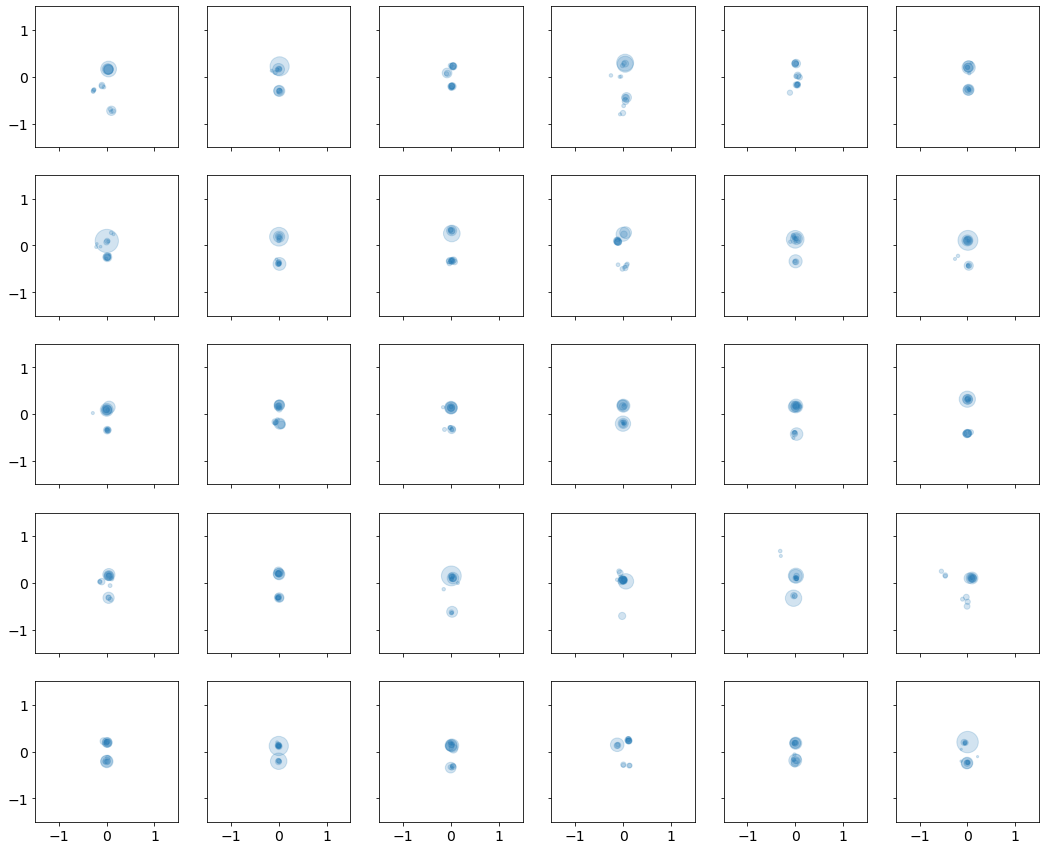

In [117]:
plt.rcParams["figure.figsize"] = (18,15)
plt.rcParams.update({'font.size': 14})
fig, axs = plt.subplots(5, 6, sharex=True, sharey=True)
axs = axs.ravel()
for i in range(30):
    plot_multiple_jets(axs, x_1[i], i)
fig.savefig('../figures/twoprong.png')

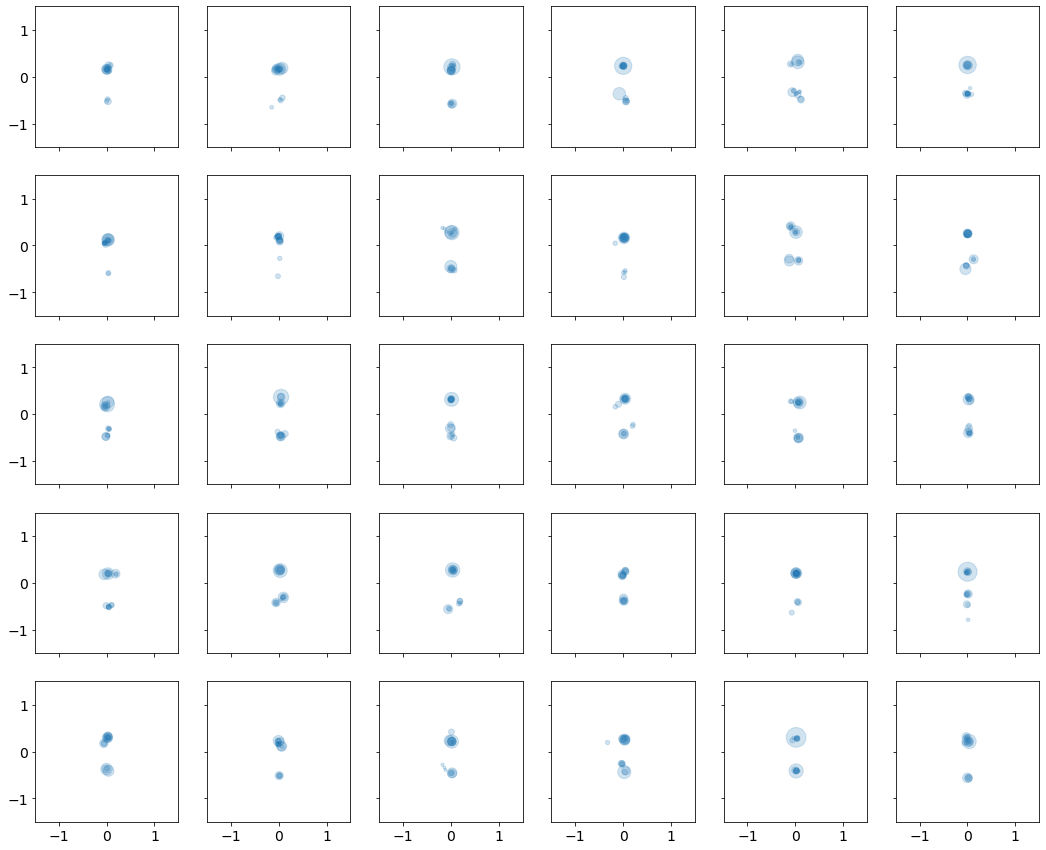

In [118]:
plt.rcParams["figure.figsize"] = (18,15)
plt.rcParams.update({'font.size': 14})
fig, axs = plt.subplots(5, 6, sharex=True, sharey=True)
axs = axs.ravel()
for i in range(30):
    plot_multiple_jets(axs, y_1[i], i)
fig.savefig('../figures/threeprong.png')

In [103]:
axs = axs.ravel()

In [104]:
axs

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>], dtype=object)

In [105]:
plot_multiple_jets(axs, x_1[0], 0)

In [107]:
fig.show()

In [83]:
x_1[0].shape

(16, 3)

In [84]:
y_1[4]

array([[ 0.16262202,  0.05342861,  0.30591914],
       [ 0.13864116,  0.04926492,  0.3533119 ],
       [ 0.08191486, -0.06054896, -0.32965937],
       [ 0.04799383,  0.11834479, -0.48983178],
       [ 0.04209786,  0.0492279 , -0.38817337],
       [ 0.03769862, -0.10139757,  0.27064151],
       [ 0.03284574,  0.11492231, -0.47692662],
       [ 0.03248452,  0.07216066,  0.30201539],
       [ 0.01859029, -0.03566883, -0.2982434 ],
       [ 0.01429144,  0.08750199,  0.31425133],
       [ 0.01374706, -0.0421227 , -0.30234197],
       [ 0.01353783,  0.08411156, -0.32151327],
       [ 0.01344722, -0.08426432,  0.26512334],
       [ 0.01226505,  0.0901777 , -0.32224128],
       [ 0.01192478,  0.00713212, -0.37336117],
       [ 0.01134671,  0.031836  , -0.35807967]])

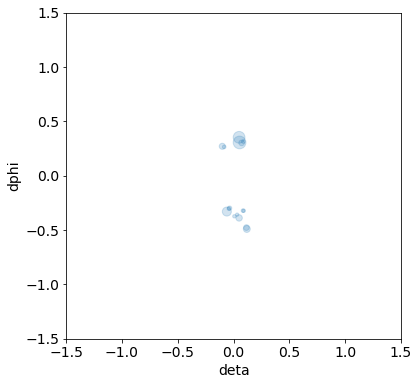

In [85]:
plot_jet(y_1[4])

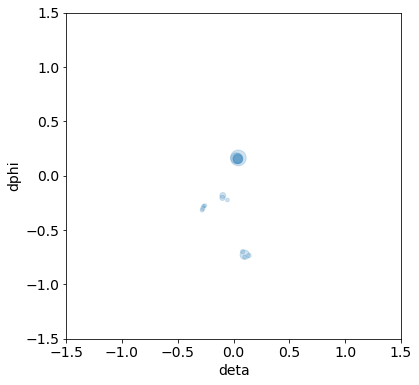

In [87]:
plot_jet(x_1[0])

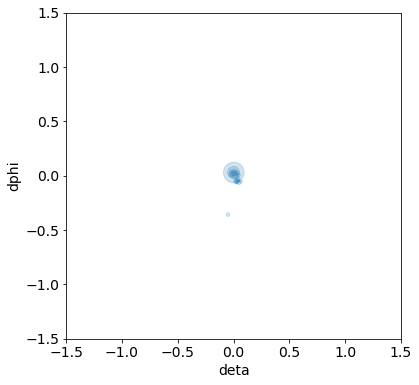

In [58]:
plot_jet(x_1[6])

In [129]:
sys.path.insert(0,'../optimal_transport')
from emdloss import *


In [37]:
df_1 = pd.read_hdf("/nobackup/users/sangeon/datasets/jetLHCO/LHCO_dijet_2p2p_4000_500_150_16part_jet1.h5")
df_2 = pd.read_hdf("/nobackup/users/sangeon/datasets/jetLHCO/LHCO_dijet_3p3p_6000_700_700_16part_jet1.h5")

dt_1 = df_1.values
dt_2 = df_2.values

In [43]:
def process_jet_data(temp):
    pt = temp[:,48]
    eta = temp[:,49]
    phi = temp[:,50]
    print(phi[:10])
    #temp[:,:48].reshape(-1, 16, 3)[:,:,0] /= pt.reshape(-1,1)
    temp[:,:48].reshape(-1, 16, 3)[:,:,0] /= np.sum(temp[:,:48].reshape(-1, 16, 3)[:,:,0], axis=1).reshape(-1, 1)
    
    temp[:,:48].reshape(-1, 16, 3)[:,:,1] -= eta.reshape(-1,1)
    #print(temp[:,:48].reshape(-1, 16, 3)[:10,0,2])
    temp[:,:48].reshape(-1, 16, 3)[:,:,2] = fix_phi_vec(temp[:,:48].reshape(-1, 16, 3)[:,:,2] - phi.reshape(-1,1) )
    #print(temp[:,:48].reshape(-1, 16, 3)[:10,0,2])

    return None


In [39]:
process_jet_data(dt_1)

[-0.28288255 -1.88601718 -3.0325504   1.88479179 -1.3634441   0.11449027
  2.11377374 -2.73808232 -1.37712454 -2.73482919]


In [40]:
np.sum(dt_1[:,:48].reshape(-1,16,3)[:,:,0],axis=1)

array([1., 1., 1., ..., 1., 1., 1.])

In [42]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

In [11]:
def plot_jet(pfcands):

    pt = pfcands[:,0]
    eta = pfcands[:,1]
    phi = pfcands[:,2]
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.scatter(eta,phi,s=pt*1000, alpha=0.2)
    ax.set_xlabel('deta')
    ax.set_ylabel('dphi')
    ax.set_xlim([-1.5,1.5])
    ax.set_ylim([-1.5,1.5])
    #fig.savefig(f'{path}/{name}.png')

In [12]:
dt_1[0,:48].reshape(-1,3)[:, 0]

array([0.19485613, 0.16618666, 0.12557794, 0.08462045, 0.05815355,
       0.03981882, 0.03867688, 0.03743095, 0.03553191, 0.03488517,
       0.03486259, 0.02078175, 0.02061202, 0.01276068, 0.01222775,
       0.01019689])

In [14]:
%load_ext autoreload
%autoreload 2

In [48]:
def process_jet_data_all(temp):
    pt = temp[:,48]
    eta = temp[:,49]
    phi = temp[:,50]
    #print(phi[:10])
    temp[:,:48].reshape(-1, 16, 3)[:,:,0] /= pt.reshape(-1,1)
    #temp[:,:48].reshape(-1, 16, 3)[:,:,0] /= np.sum(temp[:,:48].reshape(-1, 16, 3)[:,:,0])
    
    temp[:,:48].reshape(-1, 16, 3)[:,:,1] -= eta.reshape(-1,1)
    #print(temp[:,:48].reshape(-1, 16, 3)[:10,0,2])
    temp[:,:48].reshape(-1, 16, 3)[:,:,2] = fix_phi_vec(temp[:,:48].reshape(-1, 16, 3)[:,:,2] - phi.reshape(-1,1) )
    #print(temp[:,:48].reshape(-1, 16, 3)[:10,0,2])
    temp2 = np.apply_along_axis(rotate_eig, 1, temp, 16)

    return temp2

In [49]:
dt_1 = dt_1[dt_1[:,51]>300]

In [50]:
dt_1 = process_jet_data_all(dt_1)

In [224]:
print(dt_1)

NameError: name 'dt_1' is not defined

In [32]:
dt_1[0,:48].reshape(-1,16,3)[:,:,0]

array([[0.19485613, 0.16618666, 0.12557794, 0.08462045, 0.05815355,
        0.03981882, 0.03867688, 0.03743095, 0.03553191, 0.03488517,
        0.03486259, 0.02078175, 0.02061202, 0.01276068, 0.01222775,
        0.01019689]])

In [40]:
dt_1 = dt_1[dt_1[:,51]>300]

In [41]:
dt_1.shape

(38394, 54)

In [45]:
dt_1 = np.apply_along_axis(rotate_eig, 1, dt_1)

TypeError: rotate_eig() missing 1 required positional argument: 'num_part'

In [52]:
df_2p1 = pd.read_hdf("/nobackup/users/sangeon/datasets/jetLHCO/LHCO_dijet_2p2p_3200_450_450_16part_jet1.h5")
df_2p2 = pd.read_hdf("/nobackup/users/sangeon/datasets/jetLHCO/LHCO_dijet_2p2p_3200_450_450_16part_jet2.h5")
df_3p1 = pd.read_hdf("/nobackup/users/sangeon/datasets/jetLHCO/LHCO_dijet_3p3p_3200_450_450_16part_jet1.h5")
df_3p2 = pd.read_hdf("/nobackup/users/sangeon/datasets/jetLHCO/LHCO_dijet_3p3p_3200_450_450_16part_jet2.h5")
#df_3p1 = pd.read_hdf("/nobackup/users/sangeon/datasets/jetLHCO/LHCO_dijet_2p2p_4000_500_150_16part_jet1.h5")
#df_3p2 = pd.read_hdf("/nobackup/users/sangeon/datasets/jetLHCO/LHCO_dijet_2p2p_4000_500_150_16part_jet2.h5")

dt_2p1 = df_2p1.values 
dt_2p2 = df_2p2.values 
dt_3p1 = df_3p1.values 
dt_3p2 = df_3p2.values 

In [40]:
dt_2p1 = dt_2p1[(dt_2p1[:,51]<500) & (dt_2p1[:,51]>400)]
dt_2p2 = dt_2p2[(dt_2p2[:,51]<500) & (dt_2p2[:,51]>400)]
dt_3p1 = dt_3p1[(dt_3p1[:,51]<500) & (dt_3p1[:,51]>400)]
dt_3p2 = dt_3p2[(dt_3p2[:,51]<500) & (dt_3p2[:,51]>400)]

In [41]:
dt_2p1 = dt_2p1[(dt_2p1[:,48]>1000)&(dt_2p1[:,48]<1500)]
dt_2p2 = dt_2p2[(dt_2p2[:,48]>1000)&(dt_2p2[:,48]<1500)]
dt_3p1 = dt_3p1[(dt_3p1[:,48]>1000)&(dt_3p1[:,48]<1500)]
dt_3p2 = dt_3p2[(dt_3p2[:,48]>1000)&(dt_3p2[:,48]<1500)]

In [53]:
process_jet_data(dt_2p1)
process_jet_data(dt_2p2)
process_jet_data(dt_3p1)
process_jet_data(dt_3p2)

[ 0.4595973  -0.46094861  1.99597174  0.8529835   1.59282828 -0.16491634
  2.29659394 -2.74112711 -2.33926141 -2.34103584]
[-2.55309201  2.8592682  -1.14372948 -2.26800474 -1.41292532  3.01758762
 -0.80847314  0.39611139  0.50428644  0.90074528]
[ 2.16706235 -2.91106116  1.88390122  2.86544428  2.60602684 -0.86806851
  2.91490955  1.02455506 -2.48205287  2.49464361]
[-0.96255366 -0.26131752  0.56853341 -0.36653315 -0.70808394  0.83203332
  0.35236496  3.11819995  1.29649022 -0.75633996]


In [44]:
origin = np.zeros([1,2])

In [19]:
#jetcenter = np.average(dt_1[0,:48].reshape(-1,3)[:, 1:3],axis=0, weights = dt_1[0,:48].reshape(-1,3)[:, 0]).reshape(1,2)

In [63]:
#jetcenter

In [23]:
#dt_1[evt_num,:48].reshape(-1,3)[:,1:3].shape

In [45]:
def get_cov_eig(evt):
    cov_mat = np.cov(evt[:48].reshape(-1,3)[:, 1:3], aweights=evt[:48].reshape(-1,3)[:, 0] , rowvar=False)
    eig_vals, eig_vecs = np.linalg.eig(cov_mat)
    idx = eig_vals.argsort()[::1]   
    eig_vals = eig_vals[idx]
    eig_vecs = eig_vecs[:,idx]
    return eig_vecs

In [46]:
#def rotate_eig(evt, num_part):
#    new = np.copy(evt)
#    cov_mat = np.cov(evt[:3*num_part].reshape(-1,3)[:, 1:3], aweights=evt[:3*num_part].reshape(-1,3)[:, 0] , rowvar=False)
#    eig_vals, eig_vecs = np.linalg.eig(cov_mat)
#    idx = eig_vals.argsort()[::1]   
#    eig_vals = eig_vals[idx]
#    eig_vecs = eig_vecs[:,idx]
#    new[:3*num_part].reshape(-1,3)[:, 1:3] = np.matmul(evt[:3*num_part].reshape(-1,3)[:, 1:3], eig_vecs)
#    return new

In [47]:
def flip_eta(evt):
    new = np.copy(evt)
    right_quadrant = np.where(evt[:48].reshape(-1,3)[:,1]>0)
    left_quadrant = np.where(evt[:48].reshape(-1,3)[:,1]<=0)
    right_sum = np.sum(evt[:48].reshape(-1,3)[right_quadrant,0])
    left_sum = np.sum(evt[:48].reshape(-1,3)[left_quadrant,0])
    if left_sum > right_sum:
        new[:48].reshape(-1,3)[:,1] *= -1
    return new   

In [48]:
def flip(evt):
    new = np.copy(evt)
    upper_quadrant = np.where(evt[:48].reshape(-1,3)[:,2]>0)
    lower_quadrant = np.where(evt[:48].reshape(-1,3)[:,2]<=0)
    upper_sum = np.sum(evt[:48].reshape(-1,3)[upper_quadrant,0])
    lower_sum = np.sum(evt[:48].reshape(-1,3)[lower_quadrant,0])
    if lower_sum > upper_sum:
        new[:48].reshape(-1,3)[:,2] *= -1
    return new     

In [49]:
def rotate_eig(evt):
    #print(evt.shape)
    new = np.copy(evt)
    cov_mat = np.cov(evt[:48].reshape(-1,3)[:, 1:3], aweights=evt[:48].reshape(-1,3)[:, 0] , rowvar=False)
    eig_vals, eig_vecs = np.linalg.eig(cov_mat)
    idx = eig_vals.argsort()[::1]   
    eig_vals = eig_vals[idx]
    eig_vecs = eig_vecs[:,idx]
    #print(evt[:48].reshape(-1,3)[0, 1:3])
    #print(eig_vecs)
    #principal = eig_vecs[:,0]
    #R = np.array([principal,[-principal[1], principal[0]]])
    #print(R.T)
    #print(eig_vecs)
    new[:48].reshape(-1,3)[:, 1:3] = np.matmul(evt[:48].reshape(-1,3)[:, 1:3], eig_vecs)
    #print(new[:48].reshape(-1,3)[0, 1:3])
    return new
    

In [50]:
def get_cov_eig_val(evt):
    cov_mat = np.cov(evt[:48].reshape(-1,3)[:, 1:3], aweights=evt[:48].reshape(-1,3)[:, 0] , rowvar=False)
    eig_vals, eig_vecs = np.linalg.eig(cov_mat)
    idx = eig_vals.argsort()[::1]   
    eig_vals = eig_vals[idx]
    eig_vecs = eig_vecs[:,idx]
    return eig_vecs, eig_vals

In [303]:
vec, vals = get_cov_eig_val(dt_2p1[0])

In [304]:
vec

array([[ 0.29236117,  0.95630798],
       [ 0.95630798, -0.29236117]])

In [305]:
vals

array([0.00076925, 0.13883084])

In [306]:
principal = vec[:,0]

In [307]:
vec[:,0]

array([0.29236117, 0.95630798])

148.55070608392964


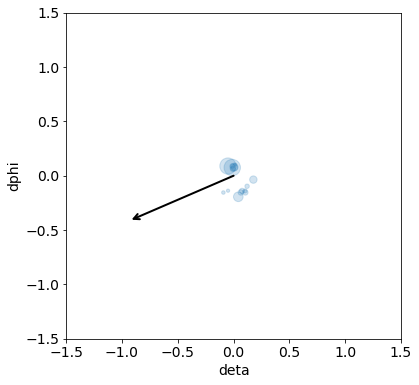

In [54]:
evt_num = 0
print(dt_2p1[evt_num,51])
plot_jet(dt_2p1[evt_num,:48].reshape(-1,3))
draw_vector(*origin, *origin+get_cov_eig(dt_2p1[evt_num])[:,0])
#draw_vector(*origin, *origin+eig_vecs[1])

In [73]:
upper_quadrant = np.where(rotate_eig(dt_2p1[evt_num])[:48].reshape(-1,3)[:,2]>0)

In [81]:
lower_quadrant = np.where(rotate_eig(dt_2p1[evt_num])[:48].reshape(-1,3)[:,2]<=0)

In [75]:
rotate_eig(dt_2p1[evt_num])[:48].reshape(-1,3)

array([[ 0.14334855,  0.00718523, -0.24910127],
       [ 0.13890703, -0.01821699, -0.25430277],
       [ 0.11179387, -0.00930238,  0.44678279],
       [ 0.08853042, -0.01524445,  0.44366664],
       [ 0.08697143, -0.00899253,  0.44900853],
       [ 0.06692088,  0.00248706,  0.45633446],
       [ 0.06028215, -0.06017454, -0.37932609],
       [ 0.05279172, -0.00756452,  0.42555702],
       [ 0.04170526,  0.03420526, -0.22448837],
       [ 0.03482049,  0.01875326, -0.28165134],
       [ 0.03284388, -0.0643558 , -0.34697362],
       [ 0.03088703,  0.05661371, -0.22553887],
       [ 0.02833604, -0.00145662,  0.44610445],
       [ 0.02821359, -0.01733575, -0.25699607],
       [ 0.02695093,  0.06592583, -0.25330696],
       [ 0.02669673, -0.00265041, -0.24528266]])

In [82]:
rotate_eig(dt_2p1[evt_num])[:48].reshape(-1,3)[lower_quadrant]

array([[ 0.14334855,  0.00718523, -0.24910127],
       [ 0.13890703, -0.01821699, -0.25430277],
       [ 0.06028215, -0.06017454, -0.37932609],
       [ 0.04170526,  0.03420526, -0.22448837],
       [ 0.03482049,  0.01875326, -0.28165134],
       [ 0.03284388, -0.0643558 , -0.34697362],
       [ 0.03088703,  0.05661371, -0.22553887],
       [ 0.02821359, -0.01733575, -0.25699607],
       [ 0.02695093,  0.06592583, -0.25330696],
       [ 0.02669673, -0.00265041, -0.24528266]])

In [79]:
rotate_eig(dt_2p1[evt_num])[:48].reshape(-1,3)[upper_quadrant]

array([[ 0.11179387, -0.00930238,  0.44678279],
       [ 0.08853042, -0.01524445,  0.44366664],
       [ 0.08697143, -0.00899253,  0.44900853],
       [ 0.06692088,  0.00248706,  0.45633446],
       [ 0.05279172, -0.00756452,  0.42555702],
       [ 0.02833604, -0.00145662,  0.44610445]])

In [83]:
np.sum(rotate_eig(dt_2p1[evt_num])[:48].reshape(-1,3)[lower_quadrant,0])

0.564655644277925

In [76]:
np.sum(rotate_eig(dt_2p1[evt_num])[:48].reshape(-1,3)[upper_quadrant,0])

0.43534435572207497

In [ ]:
dt_2p1

443.8363206887978


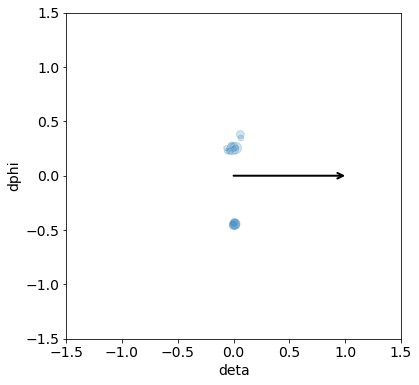

In [60]:
evt_num = 1
print(flip_eta(flip(rotate_eig(dt_2p1[evt_num])))[51])
plot_jet(flip_eta(flip(rotate_eig(dt_2p1[evt_num])))[:48].reshape(-1,3))
draw_vector(*origin, *origin+get_cov_eig(rotate_eig(dt_2p1[evt_num]))[:,0])

443.8363206887978


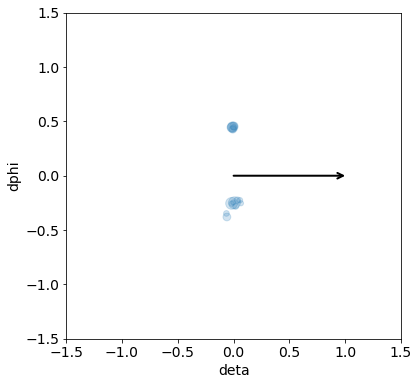

In [59]:
evt_num = 1
print(rotate_eig(dt_2p1[evt_num])[51])
plot_jet(rotate_eig(dt_2p1[evt_num])[:48].reshape(-1,3))
draw_vector(*origin, *origin+get_cov_eig(rotate_eig(dt_2p1[evt_num]))[:,0])

In [56]:
dt_1.shape

(38394, 54)

In [15]:
evt_num = 0
print(dt_new[evt_num,51])
plot_jet(dt_new[evt_num,:48].reshape(-1,3))
draw_vector(*origin, *origin+get_cov_eig(dt_new[evt_num])[:,0])
#draw_vector(*origin, *origin+eig_vecs[1])

NameError: name 'dt_new' is not defined

463.4783748690022


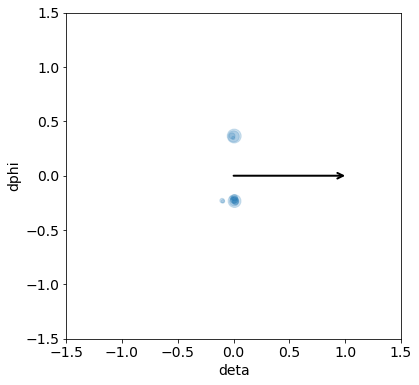

In [55]:
evt_num = 0
print(rotate_eig(dt_1[evt_num],16)[51])
plot_jet(rotate_eig(dt_1[evt_num],16)[:48].reshape(-1,3))
draw_vector(*origin, *origin+get_cov_eig(rotate_eig(dt_1[evt_num],16))[:,0])

In [39]:
dt_1[0,:48].reshape(-1,16,3)[:,:,0]

array([[302.62124634, 258.09613037, 195.02877808, 131.41976929,
         90.31535339,  61.84059906,  60.06711578,  58.13211823,
         55.18281555,  54.17840195,  54.14332962,  32.27509689,
         32.01148987,  19.81797028,  18.99031067,  15.83627605]])

492.0693594080945


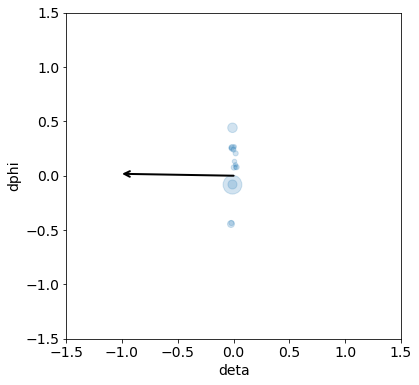

In [35]:
evt_num = 1
print(dt_1[evt_num,51])
plot_jet(dt_1[evt_num,:48].reshape(-1,3))
draw_vector(*origin, *origin+get_cov_eig(dt_1[evt_num])[:,0])
#draw_vector(*origin, *origin+eig_vecs[1])

In [71]:
df_1

array([[-8.91141684e-17, -3.12611699e-01,  1.61613654e-01, ...,
         4.63478375e+02,  4.63478375e+02,  4.63478375e+02],
       [-2.27221657e-13, -2.29981041e+00, -1.86375129e+00, ...,
         3.15212864e+01,  1.86438051e+00,  2.83297651e+01],
       [-5.54384260e-17, -2.06572160e-01, -3.00543523e+00, ...,
         1.49228912e+02,  1.47338504e+02,  1.47338504e+02],
       ...,
       [-2.30975160e-16, -1.57039583e+00, -6.82635963e-01, ...,
         5.09771456e+02,  5.09771456e+02,  5.09771456e+02],
       [-3.43026951e-17,  2.09981278e-01, -9.11282748e-02, ...,
         5.37158794e+02,  5.37158794e+02,  5.37158794e+02],
       [-3.10231284e-17,  2.64288694e-01,  2.96257067e+00, ...,
         5.05028544e+02,  5.05028544e+02,  5.05028544e+02]])

In [18]:
from sklearn.decomposition import PCA

In [1]:
new = emd_preprocess(evt1)

NameError: name 'emd_preprocess' is not defined

In [ ]:
new.shape

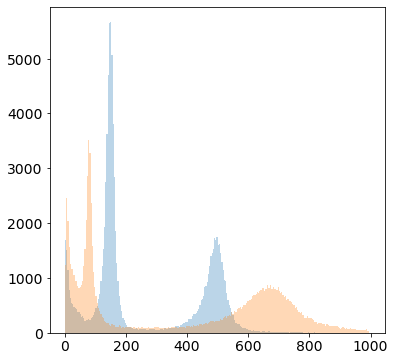

In [18]:
#plt.hist(dt_1[:,51], bins=np.arange(0,600,1));
plt.hist(dt_1[:,52], bins=np.arange(0,1000,4),alpha=0.3);
plt.hist(dt_2[:,52], bins=np.arange(0,1000,4),alpha=0.3);

#plt.hist(dt_1[:,53], bins=np.arange(0,600,1));

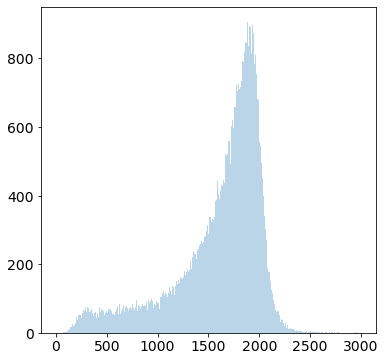

In [20]:
plt.hist(dt_1[:,48], bins=np.arange(0,3000,5), alpha=0.3);
#plt.hist(dt_2[:,48], bins=np.arange(0,3000,5), alpha=0.3);


In [52]:
evt1 = dt_1[0,:3*NPART].reshape(-1,3)

In [53]:
evt1[:,0] /= np.sum(evt1[:,0])

In [54]:
np.sum(evt1[:,0])

1.0

In [55]:
def plot_event(pfcands):

    pt = pfcands[:,0]
    eta = pfcands[:,1]
    phi = pfcands[:,2]
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.scatter(eta,phi,s=pt*1000, alpha=0.2)
    ax.set_xlabel('eta')
    ax.set_ylabel('phi')
    ax.set_xlim([-4,4])
    ax.set_ylim([-4,4])
    #fig.savefig(f'{path}/{name}.png')

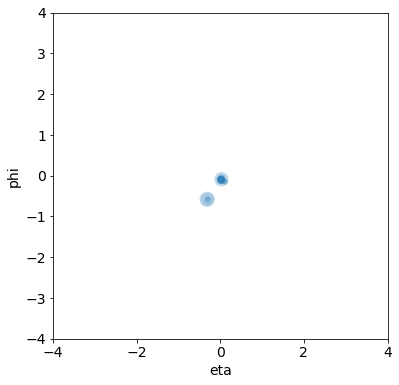

In [56]:
plot_event(evt1.reshape(-1,3))